In [ ]:
# Task 1: Load & Explore the Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
pip install tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.2 which is incompatible.



   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/331.9 MB 2.6 MB/s eta 0:02:09
   ---------------------------------------- 1.3/331.9 MB 2.5 MB/s eta 0:02:14
   ---------------------------------------- 1.8/331.9 MB 2.5 MB/s eta 0:02:12
   ---------------------------------------- 2.4/331.9 MB 2.5 MB/s eta 0:02:11
   ---------------------------------------- 2.9/331.9 MB 2.5 MB/s eta 0:02:10
   ---------------------------------------- 3.4/331.9 MB 2.6 MB/s eta 0:02:08
   ---------------------------------------- 3.9/331.9 MB 2.6 MB/s eta 0:02:06
    --------------------------------------- 4.7/331.9 MB 2.6 MB/s eta 0:02:06
    --------------------------------------- 5.2/331.9 MB 2.6 MB/s eta 0:02:06
    --------------------------------------- 5.8/331.9 MB 2.6 MB/s eta 0:02:05
    --------------------------------------- 6.3/331.9 MB 2.6 MB/s eta 0:02:05

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

d:\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [5]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 76s 0us/step


In [6]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


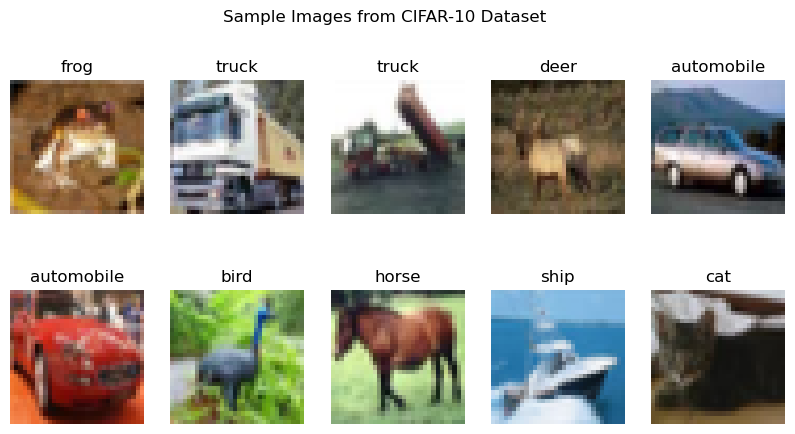

In [7]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')

plt.suptitle("Sample Images from CIFAR-10 Dataset")
plt.show()


In [8]:
print("Shape of one image:", X_train[0].shape)

Shape of one image: (32, 32, 3)


In [9]:
# Count number of images per class
unique, counts = np.unique(y_train, return_counts=True)

for label, count in zip(unique, counts):
    print(f"Class '{class_names[label]}' has {count} images")

Class 'airplane' has 5000 images
Class 'automobile' has 5000 images
Class 'bird' has 5000 images
Class 'cat' has 5000 images
Class 'deer' has 5000 images
Class 'dog' has 5000 images
Class 'frog' has 5000 images
Class 'horse' has 5000 images
Class 'ship' has 5000 images
Class 'truck' has 5000 images


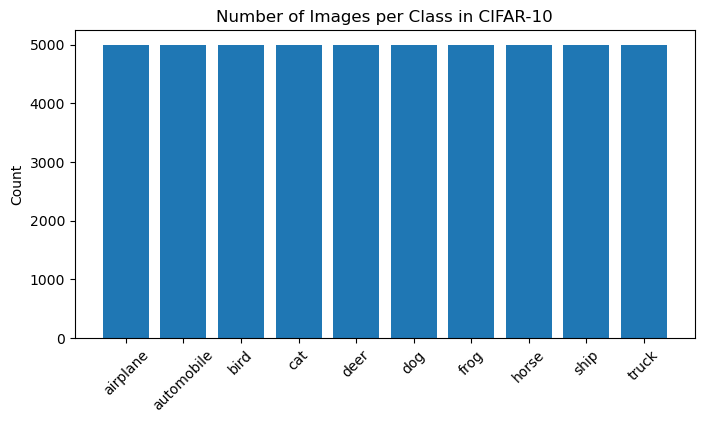

In [10]:
plt.figure(figsize=(8, 4))
plt.bar(class_names, counts)
plt.xticks(rotation=45)
plt.title("Number of Images per Class in CIFAR-10")
plt.ylabel("Count")
plt.show()

- CIFAR-10 consists of 60,000 RGB images of size 32×32
- The dataset contains 10 classes with 5,000 training images per class
- Images are balanced across all categories


---------------------------------------------------------------------------------------------------------------------

## Task 2: Preprocessing

In [ ]:
# Convert pixel values from [0, 255] to [0, 1]
X_train_norm = X_train.astype(np.float32) / 255.0
X_test_norm = X_test.astype(np.float32) / 255.0

In [12]:
print("Min value:", X_train_norm.min())
print("Max value:", X_train_norm.max())


Min value: 0.0
Max value: 1.0


In [13]:
# Flatten images into 1D vectors
X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

In [14]:
print("Original shape:", X_train_norm.shape)
print("Flattened shape:", X_train_flat.shape)


Original shape: (50000, 32, 32, 3)
Flattened shape: (50000, 3072)


- The CIFAR-10 images were normalized to improve stability
- Images were flattened into vectors to make them convenient with K-Means clustering

-------------------------------------------------------------------------------------------------------------

## Task 3: Apply K-Means

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(
    n_clusters=10,
    random_state=42,
    n_init=10
)

In [17]:
kmeans.fit(X_train_flat)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [18]:
print("K-Means Inertia:", kmeans.inertia_)

K-Means Inertia: 6071672.5


In [19]:
cluster_labels = kmeans.labels_
print(cluster_labels.shape)

(50000,)


- K-Means clustering was applied to the flattened CIFAR-10 images with k = 10
- The inertia value was reported as a measure of cluster compactness


----------------------------------------------------------------------------------------------

## Task 4: Visualize Centroids

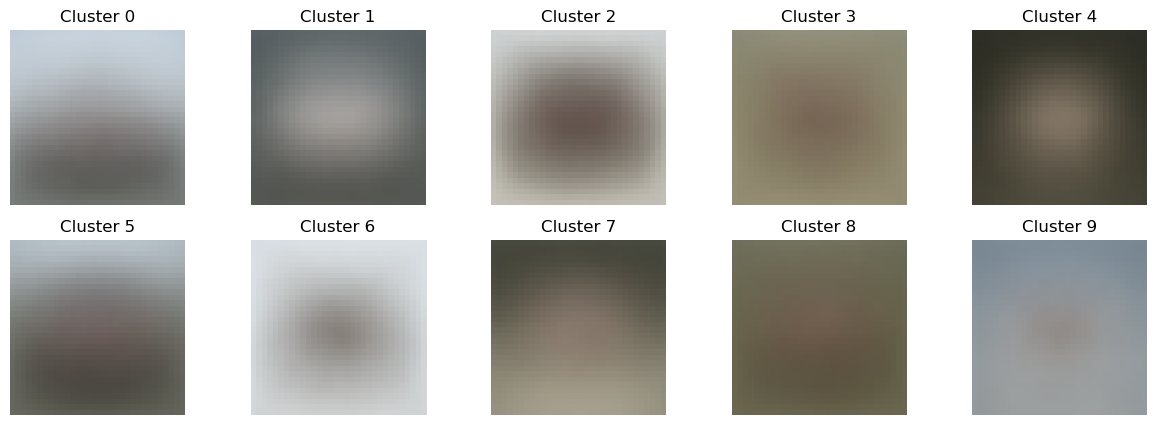

In [ ]:

centroids = kmeans.cluster_centers_


centroid_images = centroids.reshape(10, 32, 32, 3)  # 10 clusters

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(centroid_images[i])
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.show()

------------------------------------------------------------------------------------------------------------------

## Task 5: Analysis

- K-Means clusters images based on colors, not objects
- It cannot capture small details or complex shapes 
- The number of clusters (k) must be set in advance 
- Centroids are averages, not real images
- Large datasets make K-Means slow


----------------------------------------------------------------------------------------------------------------------